<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/05-cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 5: Cereal Data

## Introduction:


Everyone loves cereal. But have you ever thought deeply about your cereal? Well now is your chance to take a data driven view of your breakfast.

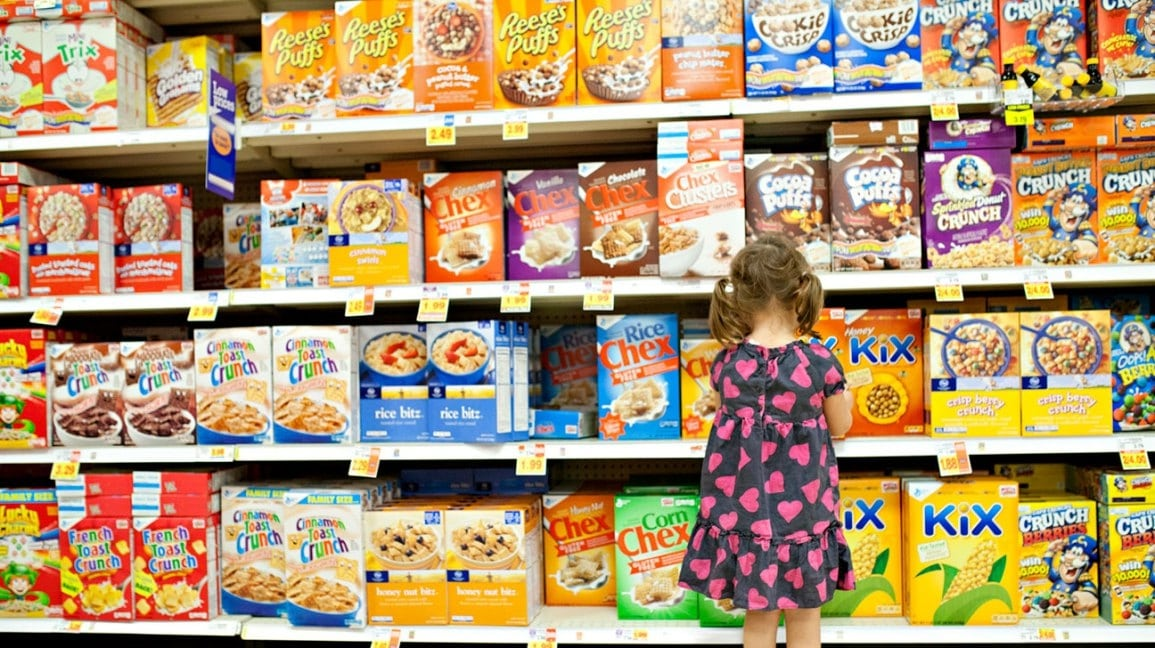


### Getting Started:
Download the data from github. Run the code below to download the data that you'll be using in this lab.

You may use pandas, numpy, matplotlib and/or seaborn for these excercises.

You can use/read their respective documentation in the links below (only if you need too, it's not required for the lab):

*   Seaborn [Documentation]("https://seaborn.pydata.org/tutorial.html")
*   Matplotlib [Documentation]("https://matplotlib.org/stable/api/index.html")
*   Numpy [Documentation]("https://numpy.org/doc/1.23/user/index.html#user")
*   Pandas [Documentation]("https://pandas.pydata.org/docs/user_guide/index.html#user-guide")







In [40]:
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Exercise 1: Protein Powder
Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the distribution of each of these macro nutrients together (i.e., three distributions on a single plot). Make sure to provide a legend.

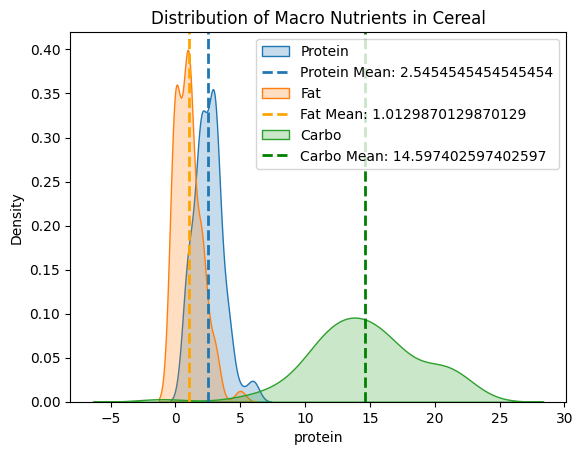

In [41]:
# Enter all of your code for exercise 1 here. Feel free to add more cells if you need to:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(cereal['protein'], label='Protein', fill=True)
proteinMean = cereal['protein'].mean()
plt.axvline(proteinMean, linestyle='dashed', linewidth=2, label=f"Protein Mean: {proteinMean}")

sns.kdeplot(cereal['fat'], label='Fat', fill=True)
fatMean = cereal['fat'].mean()
plt.axvline(fatMean, linestyle='dashed', linewidth=2, label=f"Fat Mean: {fatMean}", color='orange')

sns.kdeplot(cereal['carbo'], label='Carbo', fill=True)
carboMean = cereal['carbo'].mean()
plt.axvline(carboMean, linestyle='dashed', linewidth=2, label=f"Carbo Mean: {carboMean}", color='green')


plt.legend()
plt.title("Distribution of Macro Nutrients in Cereal")
plt.show()

## Exercise 2: Sugar Daddy
Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.

In [44]:
# Enter all of your code for exercise 2 here. Feel free to add more cells if you need to:
cerealSortedOnSugars = cereal.sort_values(by='sugars', ascending=False).head(5)
print('Most sugary cereals: ')
cerealSortedOnSugars[['name', 'sugars']]

Most sugary cereals: 


,name,sugars
30,Golden Crisp,15
66,Smacks,15
52,Post Nat. Raisin Bran,14
70,Total Raisin Bran,14
6,Apple Jacks,14


In [45]:
cerealSortedOnSugars = cereal.sort_values(by='sugars', ascending=True).head(5)
print('Least sugary cereals: ')
cerealSortedOnSugars[['name', 'sugars']]

Least sugary cereals: 


,name,sugars
57,Quaker Oatmeal,-1
3,All-Bran with Extra Fiber,0
55,Puffed Wheat,0
20,Cream of Wheat (Quick),0
63,Shredded Wheat,0


## Exercise 3: Cereal Killer
Get a list of the top 5 highest rated and lowest rated cereals.

In [46]:
# Enter all of your code for exercise 3 here. Feel free to add more cells if you need to:
cerealSortedOnRating = cereal.sort_values(by='rating', ascending=False).head(5)
print('Highest rated cereals: ')
cerealSortedOnRating[['name', 'rating']]

Highest rated cereals: 


,name,rating
3,All-Bran with Extra Fiber,93.704912
64,Shredded Wheat 'n'Bran,74.472949
65,Shredded Wheat spoon size,72.801787
0,100% Bran,68.402973
63,Shredded Wheat,68.235885


In [48]:
ratingSortedOnSugars = cereal.sort_values(by='rating', ascending=True).head(5)
print('Lowest rated cereals: ')
ratingSortedOnSugars[['name', 'rating']]

Lowest rated cereals: 


,name,rating
10,Cap'n'Crunch,18.042851
12,Cinnamon Toast Crunch,19.823573
35,Honey Graham Ohs,21.871292
18,Count Chocula,22.396513
14,Cocoa Puffs,22.736446


## Exercise 4: America
Quantify the relationship between sugar and ratings.

Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship. It may be helpful to look at the [seaborn regplot documentation]("https://seaborn.pydata.org/generated/seaborn.regplot.html").

<Axes: xlabel='sugars', ylabel='rating'>

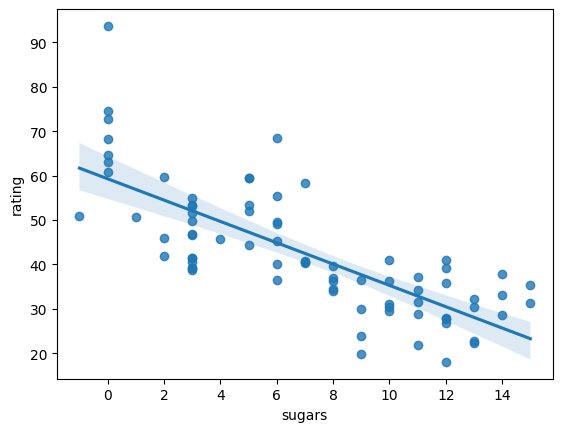

In [19]:
# Make the plot for the data visualization and line of best fit here:
sns.regplot(data=cereal, x='sugars', y='rating')


Calculate a correlation statistic describing the relationship between sugar and ratings  (i.e., r or r squared).

In [49]:
# Calculate the statistic using this cell:
rValue = cereal[['sugars', 'rating']].corr()
print('R-Value: \n', rValue, '\n')


R-Value: 
           sugars    rating
sugars  1.000000 -0.759675
rating -0.759675  1.000000 



Write a statement in plain English interpreting this statistic.

**Write your statement here:**  

Above I chose to use an r-value to calculate the correlation between sugars in a cereal and the cereal's rating. I chose to use the r-value because r-values range from -1 to 1 where -1 signifies a perfect negative correlation (as one variable increases, the other decreases at the same rate) and +1 signifies a perfect positive correlation (as one variable increases the other increases at exactly the same rate).  

So, interpreting my r-value of -0.759675 I determined that the relationship between sugar and rating is a moderately strong negative correlation. So, as sugar increases, the rating decreases slightly slower, but with a quite strong correlation.


## Exercise 5: America Part 2
Make five plots comparing the relationships of carbo, sugars, calories, protein, and fat with rating.

Text(0.5, 1.0, 'Rating vs. Carbs in Cereal')

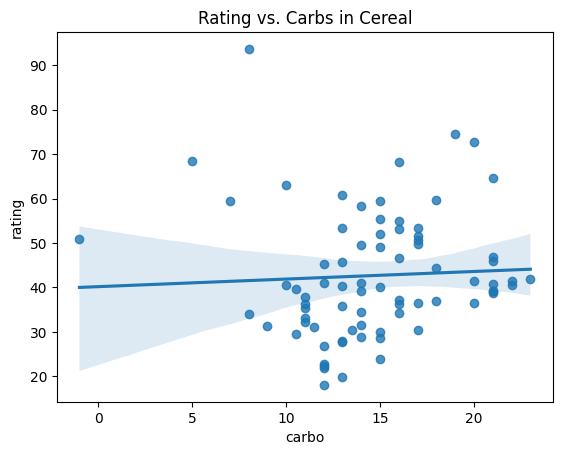

In [25]:
# Write your code to compare the various variables with rating below:
sns.regplot(data=cereal, x='carbo', y='rating').set_title('Rating vs. Carbs in Cereal')

Text(0.5, 1.0, 'Rating vs. Sugars in Cereal')

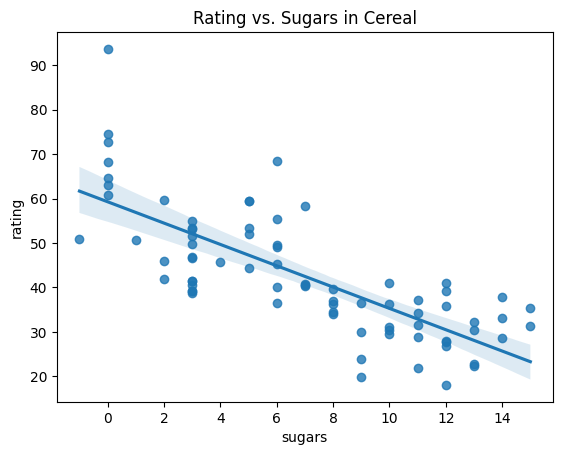

In [26]:
sns.regplot(data=cereal, x='sugars', y='rating').set_title('Rating vs. Sugars in Cereal')

Text(0.5, 1.0, 'Rating vs. Calories in Cereal')

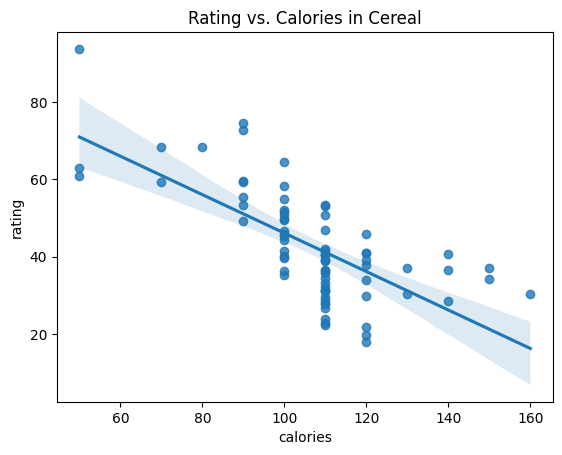

In [27]:
sns.regplot(data=cereal, x='calories', y='rating').set_title('Rating vs. Calories in Cereal')

Text(0.5, 1.0, 'Rating vs. Protein in Cereal')

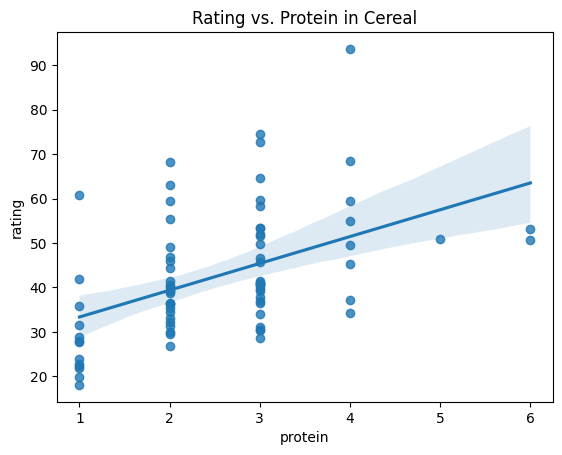

In [28]:
sns.regplot(data=cereal, x='protein', y='rating').set_title('Rating vs. Protein in Cereal')

Text(0.5, 1.0, 'Rating vs. Fat in Cereal')

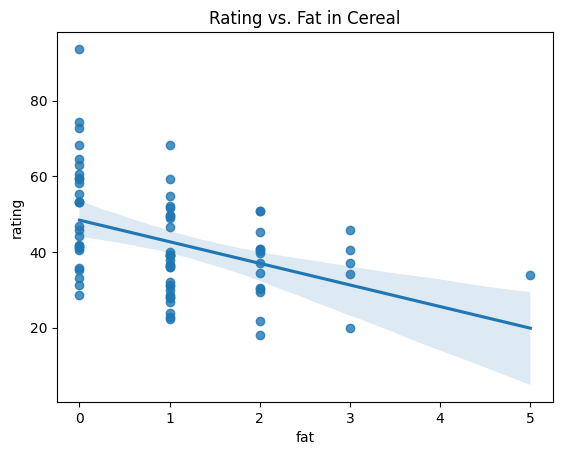

In [29]:
sns.regplot(data=cereal, x='fat', y='rating').set_title('Rating vs. Fat in Cereal')

Of the variables carbo, sugars, calories, protein, and fat, which has the strongest relationship with rating? Justify your answer.

(Write your statement here)

## Exercise 6: Preparing for Mt. Everest
Do the same as you did with exercise 5, but instead compare carbo, sugars, protein, and fat with calories.

Text(0.5, 1.0, 'Calories vs. Carbs in Cereal')

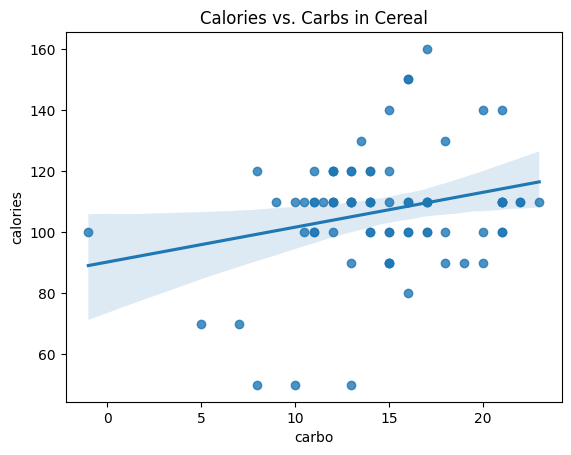

In [30]:
# Write your code to compare the various variables with calories below:
sns.regplot(data=cereal, x='carbo', y='calories').set_title('Calories vs. Carbs in Cereal')

Text(0.5, 1.0, 'Calories vs. sugars in Cereal')

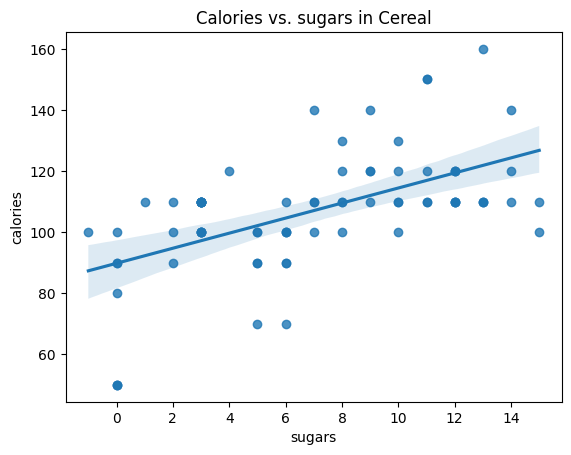

In [31]:
sns.regplot(data=cereal, x='sugars', y='calories').set_title('Calories vs. sugars in Cereal')

Text(0.5, 1.0, 'Calories vs. Protein in Cereal')

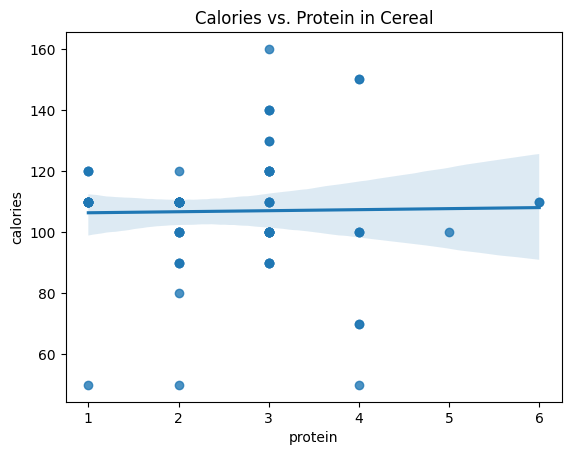

In [32]:
sns.regplot(data=cereal, x='protein', y='calories').set_title('Calories vs. Protein in Cereal')

Text(0.5, 1.0, 'Calories vs. Fat in Cereal')

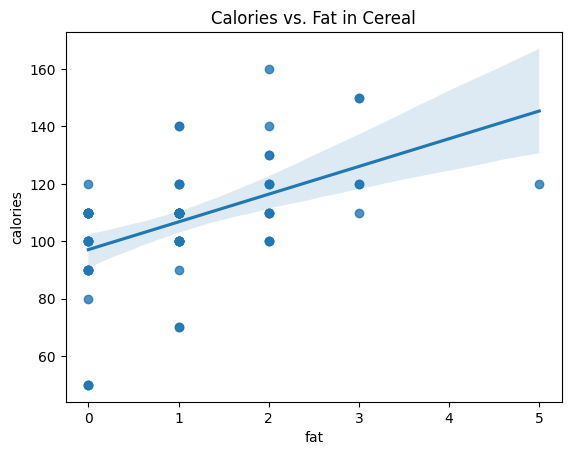

In [33]:
sns.regplot(data=cereal, x='fat', y='calories').set_title('Calories vs. Fat in Cereal')

Of the variables carbo, sugars, protein, and fat, which has the strongest relationship with calories? Justify your answer.

(Write your statement here)

## Exercise 7: It’s Hot and It's Cold
The type column has two values: H='hot' and C='cold'. What is the average rating of each type?

In [36]:
# Write your code to get the average rating by type of cereal below:
hotCereals = cereal[cereal['type'] == 'H']
coldCereals = cereal[cereal['type'] == 'C']

print('Average Rating for Hot Cereal: ', hotCereals['rating'].mean())
print('Average Rating for Cold Cereal: ', coldCereals['rating'].mean())

Average Rating for Hot Cereal:  56.73770833333334
Average Rating for Cold Cereal:  42.09521836486486


## Exercise 8: Captain Crunch the Numbers
Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the figure was interesting to you.

Text(0.5, 1.0, 'Rating vs. Sugars in Cereal')

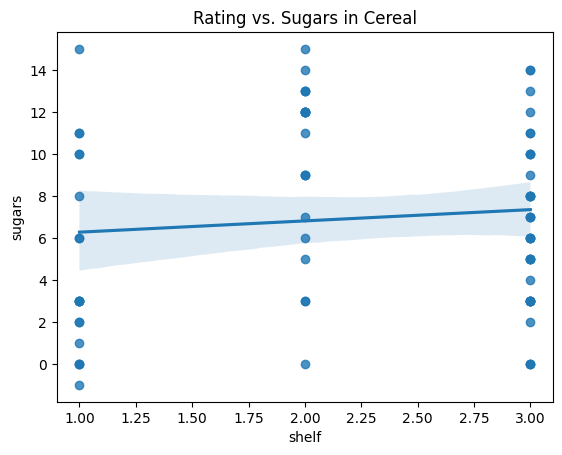

In [39]:
# Create the extra plot below:
sns.regplot(data=cereal, x='shelf', y='sugars').set_title('Rating vs. Sugars in Cereal')

(Write why it was interesting here)